In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [4]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [5]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_preprocessed.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  
])

C:\Users\OM DHAMAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

In [11]:
history = model.fit(
    X_train_preprocessed, y_train,
    validation_data=(X_test_preprocessed, y_test),
    epochs=40,
    batch_size=32,
    verbose=1
)

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 38402703360.0000 - mae: 178551.5781 - val_loss: 39642857472.0000 - val_mae: 178811.0312
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 38983573504.0000 - mae: 181475.0469 - val_loss: 39456559104.0000 - val_mae: 178328.9375
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 36451356672.0000 - mae: 176273.1562 - val_loss: 38300282880.0000 - val_mae: 175315.6875
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 35486437376.0000 - mae: 174731.9844 - val_loss: 34382151680.0000 - val_mae: 164765.8125
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 31733037056.0000 - mae: 161122.8594 - val_loss: 25802215424.0000 - val_mae: 139051.9531
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 22981619712.0000 - mae: 132512.7031 - val_loss: 13581685760.0000 - val_mae: 92002.9688
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9601671168.0000 - mae: 76137.8047 - val_loss: 4787162112.000

In [12]:
test_loss, test_mae = model.evaluate(X_test_preprocessed, y_test, verbose=0)
print(f"\nTest MAE: ${test_mae:.2f}")
print(f"Approximate Average Error: {test_mae/y_test.mean():.2%}")


Test MAE: $19093.46
Approximate Average Error: 10.68%


In [13]:
sample_prediction = model.predict(X_test_preprocessed[:1])
print(f"\nSample prediction: ${sample_prediction[0][0]:.2f}")
print(f"Actual value: ${y_test.iloc[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step

Sample prediction: $142628.94
Actual value: $154500.00


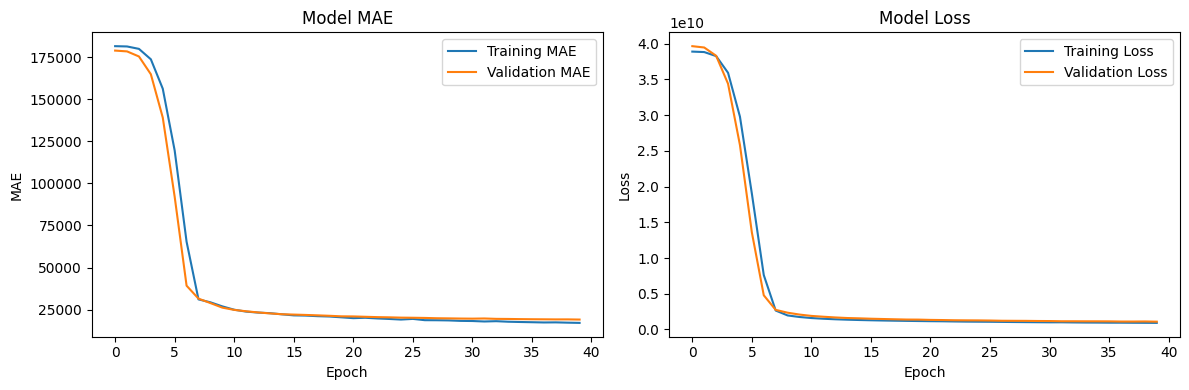

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()